# Importing Drive & Libraries

In [ ]:
import tensorflow as tf

import os
import cv2
import time

from matplotlib import pyplot as plt
from IPython import display
from tqdm import tqdm

from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Model Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocessing the training Data

In [ ]:
PATH_TRAIN = "/content/drive/MyDrive/Dokship_AI_Challange/Dataset/Classification_Dataset/Training_Dataset/Classification_Dataset/Training_Data/"

In [ ]:
BATCH_SIZE = 32
IMG_HEIGHT = 256 
IMG_WIDTH = 256 
CHANNELS = 3

loading a test image

In [ ]:
def load(image_file):
  image = tf.io.read_file(image_file)
  image = tf.image.decode_jpeg(image)
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, size = [IMG_HEIGHT, IMG_WIDTH])

  return image

(256, 256, 3)


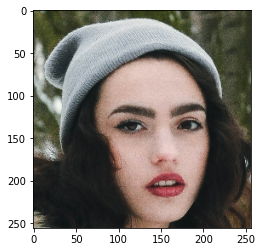

In [ ]:
import numpy as np
re = load(PATH_TRAIN+'Fake_Images/hard_226_0100.jpg')
plt.figure()
plt.imshow(re/255.0)
print(re.shape)

label for the patch-gan type discriminator to identify the fake features in the provided image as labels

(30, 30, 3)


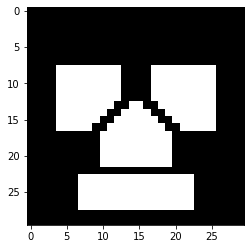

In [ ]:
test_np = np.zeros((30,30,3),dtype = 'float32')
print(test_np.shape)

# left eye in image
test_np[8][4:13] = 1
test_np[9][4:13] = 1
test_np[10][4:13] = 1
test_np[11][4:13] = 1
test_np[12][4:13] = 1
test_np[13][4:12] = 1
test_np[14][4:11] = 1
test_np[15][4:10] = 1
test_np[16][4:9] = 1

# right eye in image
test_np[8][17:26] = 1
test_np[9][17:26] = 1
test_np[10][17:26] = 1
test_np[11][17:26] = 1
test_np[12][17:26] = 1
test_np[13][18:26] = 1
test_np[14][19:26] = 1
test_np[15][20:26] = 1
test_np[16][21:26] = 1

# nose in the image
test_np[13][14:16] = 1
test_np[14][13:17] = 1
test_np[15][12:18] = 1
test_np[16][11:19] = 1
test_np[17][10:20] = 1
test_np[18][10:20] = 1
test_np[19][10:20] = 1
test_np[20][10:20] = 1
test_np[21][10:20] = 1

# lips in the image
test_np[23][7:23] = 1
test_np[24][7:23] = 1
test_np[25][7:23] = 1
test_np[26][7:23] = 1
test_np[27][7:23] = 1


plt.imshow(test_np)

loading the image dataset

In [ ]:
data_dir_list = os.listdir(PATH_TRAIN)
data_dir_list

['Real_Images', 'Fake_Images']

In [ ]:
img_data_list = []
image_path_list = []
fake_image_names = []

In [ ]:
for dataset in data_dir_list:
    img_list = os.listdir(PATH_TRAIN+dataset+'/')
    print('Loading the images of dataset - '+ '{}\n'.format(dataset))
    count = 0
    for img in tqdm(img_list):
        if dataset == 'Fake_Images':
          fake_image_names.append(img)
        img_path = PATH_TRAIN+dataset+'/'+img
        image_path_list.append(img_path)
        image = tf.io.read_file(img_path)
        image = tf.image.decode_jpeg(image)
        image = tf.cast(image, tf.float32)
        image = tf.image.resize(image, size = [IMG_HEIGHT, IMG_WIDTH])
        img_data_list.append(image)
        count = count+1
        if count == 700:
          break

  0%|          | 0/861 [00:00<?, ?it/s]

Loading the images of dataset - Real_Images



  0%|          | 0/760 [00:00<?, ?it/s]

Loading the images of dataset - Fake_Images




 92%|█████████▏| 699/760 [03:34<00:18,  3.30it/s]

In [ ]:
img_data = np.array(img_data_list)
img_data = img_data
print(img_data.shape)

(1400, 256, 256, 3)


In [ ]:
img_data.dtype

dtype('float32')

making the patch labels for fake images and real images

In [ ]:
len(fake_image_names)

700

In [ ]:
num_classes = 2
num_of_samples = img_data.shape[0]
# do something with labels for the images
labels_real = np.zeros((700,30,30,1), dtype = 'float32') 
labels_fake = np.zeros((700,30,30,1), dtype = 'float32')

In [ ]:
for i in tqdm(range(700)):
  name = fake_image_names[i]
  x = name.split("_",)
  section = x[2]
  identity = section.split(".")
  label = identity[0]

  if len(label) == 3:
    label = label + "0"

  if label[0] == '1':
    # left eye in image
    labels_fake[i][8][4:13] = 1
    labels_fake[i][9][4:13] = 1
    labels_fake[i][10][4:13] = 1
    labels_fake[i][11][4:13] = 1
    labels_fake[i][12][4:13] = 1
    labels_fake[i][13][4:12] = 1
    labels_fake[i][14][4:11] = 1
    labels_fake[i][15][4:10] = 1
    labels_fake[i][16][4:9] = 1

  if label[1] == '1':
    # right eye in image
    labels_fake[i][8][17:26] = 1
    labels_fake[i][9][17:26] = 1
    labels_fake[i][10][17:26] = 1
    labels_fake[i][11][17:26] = 1
    labels_fake[i][12][17:26] = 1
    labels_fake[i][13][18:26] = 1
    labels_fake[i][14][19:26] = 1
    labels_fake[i][15][20:26] = 1
    labels_fake[i][16][21:26] = 1

  if label[2] == '1':
    # nose in the image
    labels_fake[i][13][14:16] = 1
    labels_fake[i][14][13:17] = 1
    labels_fake[i][15][12:18] = 1
    labels_fake[i][16][11:19] = 1
    labels_fake[i][17][10:20] = 1
    labels_fake[i][18][10:20] = 1
    labels_fake[i][19][10:20] = 1
    labels_fake[i][20][10:20] = 1
    labels_fake[i][21][10:20] = 1

  if label[3] == '1':
    # lips in the image
    labels_fake[i][23][7:23] = 1
    labels_fake[i][24][7:23] = 1
    labels_fake[i][25][7:23] = 1
    labels_fake[i][26][7:23] = 1
    labels_fake[i][27][7:23] = 1

print("Fake_Image_Labels_Generated!!!")



100%|██████████| 700/700 [00:00<00:00, 34503.58it/s]

Fake_Image_Labels_Generated!!!


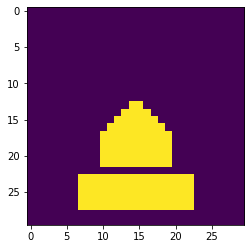

In [ ]:
result_fake_label = labels_fake[101]
img_test = np.squeeze(result_fake_label)

plt.imshow(img_test)

In [ ]:
labels = np.concatenate((labels_real,labels_fake))

names = ['zeros_Real_Images', 'ones_Fake_Images']

labels.shape

(1400, 30, 30, 1)

validating the created labels

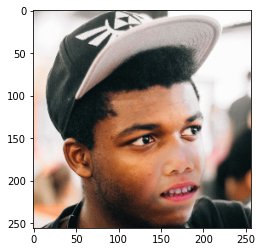

In [ ]:
plt.imshow(img_data[801]/255)

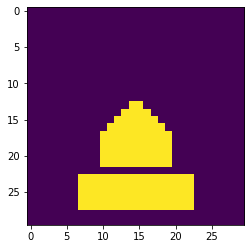

In [ ]:
result_fake_label = labels[801]
img_test = np.squeeze(result_fake_label)

plt.imshow(img_test)

Train and Validation Data split

In [ ]:
x,y = shuffle(img_data,labels, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1260, 256, 256, 3)
(1260, 30, 30, 1)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(140, 256, 256, 3)
(140, 30, 30, 1)


## Patch-GAN based discriminator model

making the model

In [ ]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [ ]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')

  down1 = downsample(64, 4, False)(inp) # (bs, 128, 128, 64)
  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down1) # (bs, 130, 130, 64)
  conv1 = tf.keras.layers.Conv2D(128, 4, strides=1,kernel_initializer=initializer,use_bias=False)(zero_pad1) # (bs, 31, 31, 512)
  batchnorm1 = tf.keras.layers.BatchNormalization()(conv1)
  leaky_relu1 = tf.keras.layers.LeakyReLU()(batchnorm1)

  
  down2 = downsample(128, 4)(leaky_relu1) # (bs, 64, 64, 128)
  zero_pad2 = tf.keras.layers.ZeroPadding2D()(down2) # (bs, 130, 130, 256)
  conv2 = tf.keras.layers.Conv2D(256, 4, strides=1,kernel_initializer=initializer,use_bias=False)(zero_pad2) # (bs, 127, 127, 512)
  batchnorm2 = tf.keras.layers.BatchNormalization()(conv2)
  leaky_relu2 = tf.keras.layers.LeakyReLU()(batchnorm2)

  down3 = downsample(256, 4)(leaky_relu2) # (bs, 32, 32, 256)
  zero_pad3 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
  conv3 = tf.keras.layers.Conv2D(512, 4, strides=1,kernel_initializer=initializer,use_bias=False)(zero_pad3) # (bs, 31, 31, 512)
  batchnorm3 = tf.keras.layers.BatchNormalization()(conv3)
  leaky_relu3 = tf.keras.layers.LeakyReLU()(batchnorm3)

  zero_pad4 = tf.keras.layers.ZeroPadding2D()(leaky_relu3) # (bs, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1, activation='sigmoid', kernel_initializer=initializer)(zero_pad4) # (bs, 30, 30, 1)

  return tf.keras.Model(inputs=inp, outputs=last)

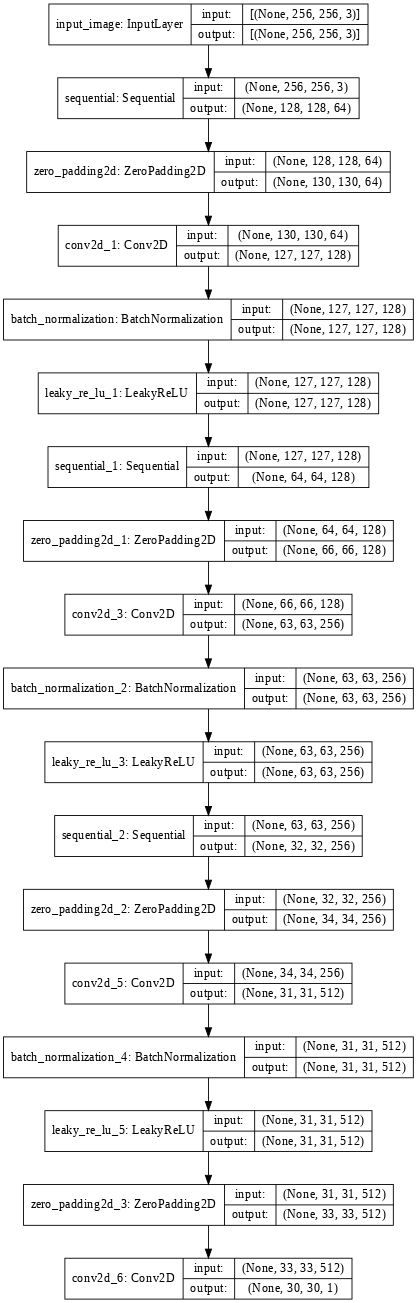

In [ ]:
Classifier_Model = Discriminator()
tf.keras.utils.plot_model(Classifier_Model, show_shapes=True, dpi=64)

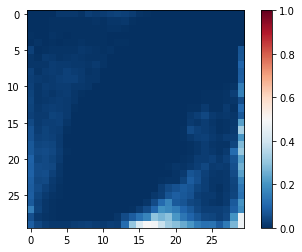

In [ ]:
disc_out = Classifier_Model([tf.expand_dims(img_data[500],0)], training=False)
plt.imshow(disc_out[0,...,-1], vmin=0, vmax=1, cmap='RdBu_r')
plt.colorbar()

specifying the optimizer and loss function

In [ ]:
opt = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [ ]:
Classifier_Model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

In [ ]:
Classifier_Model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 256, 256, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 128, 128, 64)      3072      
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 130, 130, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 128)     131072    
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 128)     512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 127, 127, 128)     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 64, 64, 128)       262656

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('Fake_Face_Detector.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()]

training the model

In [ ]:
history = Classifier_Model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data = (X_test, y_test), callbacks = callbacks)

Epoch 1/50
40/40 [==============================] - 24s 528ms/step - loss: 0.5740 - accuracy: 0.7833 - val_loss: 0.4415 - val_accuracy: 0.9002
Epoch 2/50
40/40 [==============================] - 20s 497ms/step - loss: 0.3036 - accuracy: 0.8817 - val_loss: 0.4951 - val_accuracy: 0.8867
Epoch 3/50
40/40 [==============================] - 19s 472ms/step - loss: 0.2972 - accuracy: 0.8870 - val_loss: 0.2871 - val_accuracy: 0.9024
Epoch 4/50
40/40 [==============================] - 19s 466ms/step - loss: 0.3044 - accuracy: 0.8749 - val_loss: 0.2675 - val_accuracy: 0.9015
Epoch 5/50
40/40 [==============================] - 19s 472ms/step - loss: 0.2863 - accuracy: 0.8847 - val_loss: 0.3144 - val_accuracy: 0.8697
Epoch 6/50
40/40 [==============================] - 19s 480ms/step - loss: 0.2861 - accuracy: 0.8836 - val_loss: 0.2652 - val_accuracy: 0.9018
Epoch 7/50
40/40 [==============================] - 19s 481ms/step - loss: 0.2806 - accuracy: 0.8835 - val_loss: 0.2603 - val_accuracy: 0.8993

ploting the training results

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


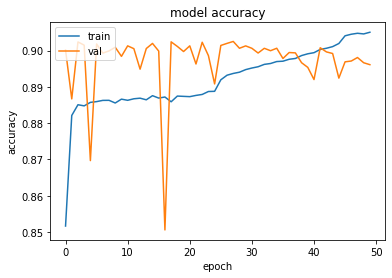

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'][0:50])
plt.plot(history.history['val_accuracy'][0:50])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

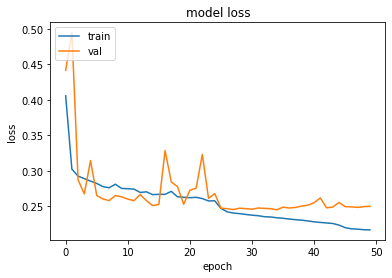

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'][0:50])
plt.plot(history.history['val_loss'][0:50])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

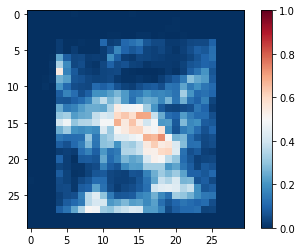

In [ ]:
disc_out = Classifier_Model([tf.expand_dims(img_data[801],0)], training=False)
plt.imshow(disc_out[0,...,-1], vmin=0, vmax=1, cmap='RdBu_r')
plt.colorbar()

## Binary Classification Model

preparing the training labels for model

In [ ]:
num_of_samples = img_data.shape[0]
labels_2 = np.ones((num_of_samples), dtype = 'int32')

In [ ]:
labels_2[:700] = 0
labels_2[700:] = 1

names = ['Real_Images', 'Fake_Images']

labels_2.shape

(1400,)

In [ ]:
x_2,y_2 = shuffle(img_data,labels_2, random_state=2)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size = 0.1, random_state = 2)

making a binary classfication model by hybridization of Patch-GAN based discriminator model

In [ ]:
model = tf.keras.models.load_model('Fake_Face_Detector.h5')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 256, 256, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 128, 128, 64)      3072      
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 130, 130, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 128)     131072    
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 128)     512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 127, 127, 128)     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 64, 64, 128)       262656

In [ ]:
last_layer = model.get_layer('zero_padding2d_3').output
x = tf.keras.layers.Flatten()(last_layer)
x = tf.keras.layers.Dense(512, activation='relu', name='fc2')(x)
x = tf.keras.layers.Dense(256, activation='relu', name='fc3')(x)
x = tf.keras.layers.Dense(128, activation='relu', name='fc4')(x)
out = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'output')(x)
Final_model_1 = tf.keras.Model(model.input, out)

In [ ]:
for layer in Final_model_1.layers[:-5]:
    layer.trainable = False

specifying the optimizer and loss function

In [ ]:
opt = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"
)

In [ ]:
Final_model_1.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

In [ ]:
Final_model_1.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 256, 256, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 128, 128, 64)      3072      
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 130, 130, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 128)     131072    
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 128)     512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 127, 127, 128)     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 64, 64, 128)       2626

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('Fake_Face_Detector_improved.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()]

training the model

In [ ]:
history = Final_model_1.fit(X_train_2, y_train_2, batch_size=32, epochs=30, verbose=1, validation_data = (X_test_2, y_test_2), callbacks = callbacks)

Epoch 1/30
40/40 [==============================] - 7s 162ms/step - loss: 3.2262 - accuracy: 0.5218 - val_loss: 0.7166 - val_accuracy: 0.4357
Epoch 2/30
40/40 [==============================] - 7s 161ms/step - loss: 0.6941 - accuracy: 0.5106 - val_loss: 0.8362 - val_accuracy: 0.5714
Epoch 3/30
40/40 [==============================] - 6s 157ms/step - loss: 0.6837 - accuracy: 0.6094 - val_loss: 0.6556 - val_accuracy: 0.6143
Epoch 4/30
40/40 [==============================] - 6s 158ms/step - loss: 0.6294 - accuracy: 0.6710 - val_loss: 0.6674 - val_accuracy: 0.6571
Epoch 5/30
40/40 [==============================] - 6s 159ms/step - loss: 0.6052 - accuracy: 0.6723 - val_loss: 0.8026 - val_accuracy: 0.4929
Epoch 6/30
40/40 [==============================] - 6s 159ms/step - loss: 0.5729 - accuracy: 0.7049 - val_loss: 0.7861 - val_accuracy: 0.5214
Epoch 7/30
40/40 [==============================] - 6s 161ms/step - loss: 0.5476 - accuracy: 0.7213 - val_loss: 0.7433 - val_accuracy: 0.6214
Epoch 

ploting the training results

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


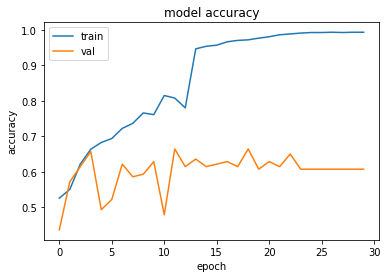

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'][0:50])
plt.plot(history.history['val_accuracy'][0:50])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

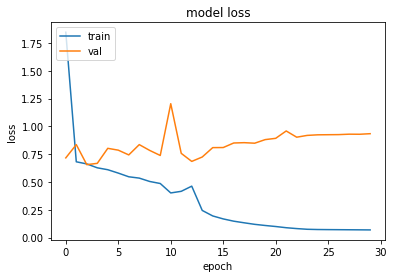

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'][0:50])
plt.plot(history.history['val_loss'][0:50])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model Testing and image classification

## Predection on provided images for competetion

Note: We can also use the test dataset for predection purpose, provided in the dataset folder

loading the images

In [ ]:
PATH_TEST = "/content/drive/MyDrive/Dokship_AI_Challange/Dataset/Classification_Dataset/Final_Submission_Dataset/"

In [ ]:
data_dir_list = os.listdir(PATH_TEST)
data_dir_list

['Images']

In [ ]:
img_data_list = []
image_path_list = []
image_names = []

In [ ]:
for dataset in data_dir_list:
    img_list = os.listdir(PATH_TEST+dataset+'/')
    print('Loading the images of dataset - '+ '{}\n'.format(dataset))
    count = 0
    for img in tqdm(img_list):
        image_names.append(img)
        img_path = PATH_TEST+dataset+'/'+img
        image_path_list.append(img_path)
        image = tf.io.read_file(img_path)
        image = tf.image.decode_jpeg(image)
        image = tf.cast(image, tf.float32)
        image = tf.image.resize(image, size = [IMG_HEIGHT, IMG_WIDTH])
        img_data_list.append(image)
        count = count+1
        if count == 700:
          break



  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 114.84it/s]

Loading the images of dataset - Images



In [ ]:
image_names

['i10.jpg',
 'i12.jpg',
 'i2.png',
 'i5.jpg',
 'i7.jpg',
 'i9.jpg',
 'i8.jpg',
 'i3.jpg',
 'i1.jpg',
 'i11.jpg',
 'i4.jpg',
 'i6.jpg']

In [ ]:
img_data = np.array(img_data_list)
img_data = img_data
print(img_data.shape)

(12, 256, 256, 3)


loading the model

In [ ]:
prediction_model = tf.keras.models.load_model("Fake_Face_Detector_improved.h5")

In [ ]:
prediction_model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 256, 256, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 128, 128, 64)      3072      
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 130, 130, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 128)     131072    
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 128)     512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 127, 127, 128)     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 64, 64, 128)       2626

predecting the results for provided the images

In [ ]:
predictions = prediction_model.predict(img_data)

In [ ]:
predictions

array([[0.45883435],
       [0.53994495],
       [0.56364477],
       [0.35255852],
       [0.3463646 ],
       [0.33328605],
       [0.36241844],
       [0.44030073],
       [0.30348286],
       [0.57759434],
       [0.41216388],
       [0.45482653]], dtype=float32)

using haarcascade for frontal face with cv2 for detecting frontal face and differentiating from other objects.

In [ ]:
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

specifying the labels to predicted values based on some threshold conditions and detection results from harr cascade.

In [ ]:
labels = []
for i in range(len(predictions)):
  bboxes = face_detector.detectMultiScale(np.uint8(img_data[i]))
  if len(bboxes) == 0:
    labels.append('Other Object')
  else:
    if predictions[i] > 0.5:
      labels.append('Fake Face')
    else:
      labels.append('Real Face')

In [ ]:
labels

['Other Object',
 'Fake Face',
 'Fake Face',
 'Real Face',
 'Real Face',
 'Other Object',
 'Other Object',
 'Real Face',
 'Real Face',
 'Fake Face',
 'Real Face',
 'Real Face']

Real Face


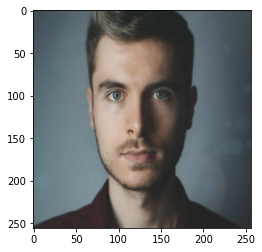

In [ ]:
j = 8 
print(labels[j])
plt.imshow(img_data[j]/255)

plotting the final results with predected label of the image on the top and related image below that label.

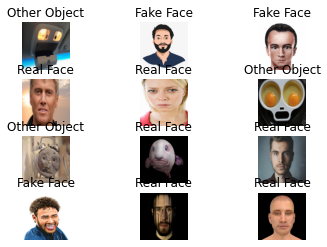

In [ ]:
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.title(labels[i])
    plt.imshow(img_data[i]/255)
    plt.axis('off')

Note: The same results can be saved in a csv file further

In [ ]:
import csv

In [ ]:
with open('output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # the following line for code is for name refrence purpose only we can comment it out
    writer.writerow(["Image_Name", "Predected_Label"])
    for i in range(len(image_names)):
      writer.writerow([image_names[i], labels[i]])